In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Generate synthetic user data
def generate_user_data(num_users=1000):
    users = []
    for i in range(num_users):
        user_id = f"User_{i}"
        # Generate random user attributes such as age, gender, etc.
        age = np.random.randint(18, 65)
        gender = np.random.choice(['Male', 'Female'])
        users.append({'User_ID': user_id, 'Age': age, 'Gender': gender})
    user_df = pd.DataFrame(users)
    user_df.to_csv('user_data.csv', index=False)
    return user_df

# Generate synthetic transaction data
def generate_transaction_data(num_transactions=5000, num_users=1000):
    transactions = []
    for i in range(num_transactions):
        user_id = f"User_{np.random.randint(num_users)}"
        timestamp = datetime.now() - timedelta(days=np.random.randint(1, 365))
        # Simulate various transaction details such as product, amount, etc.
        product = f"Product_{np.random.randint(1, 100)}"
        amount = np.random.randint(10, 1000)
        transactions.append({'User_ID': user_id, 'Timestamp': timestamp, 'Product': product, 'Amount': amount})
    transaction_df = pd.DataFrame(transactions)
    transaction_df.to_csv('transaction_data.csv', index=False)
    return transaction_df

# Generate synthetic event logs
def generate_event_logs(num_logs=10000, num_users=1000):
    event_logs = []
    for i in range(num_logs):
        user_id = f"User_{np.random.randint(num_users)}"
        timestamp = datetime.now() - timedelta(minutes=np.random.randint(1, 1440))
        # Simulate various user actions such as login, browse, purchase, etc.
        action = np.random.choice(['Login', 'Browse', 'Add_to_Cart', 'Purchase'])
        event_logs.append({'User_ID': user_id, 'Timestamp': timestamp, 'Action': action})
    event_logs_df = pd.DataFrame(event_logs)
    event_logs_df.to_csv('event_logs.csv', index=False)
    return event_logs_df

# Generate synthetic feature data for fraud detection
def generate_feature_data(event_logs):
    # Dummy feature extraction (example: frequency of actions)
    features = event_logs.groupby(['User_ID', 'Action']).size().unstack(fill_value=0)
    features.reset_index(inplace=True)
    features.to_csv('feature_data.csv', index=False)
    return features

# Example usage:
user_data = generate_user_data()
transaction_data = generate_transaction_data()
event_logs = generate_event_logs()
feature_data = generate_feature_data(event_logs)


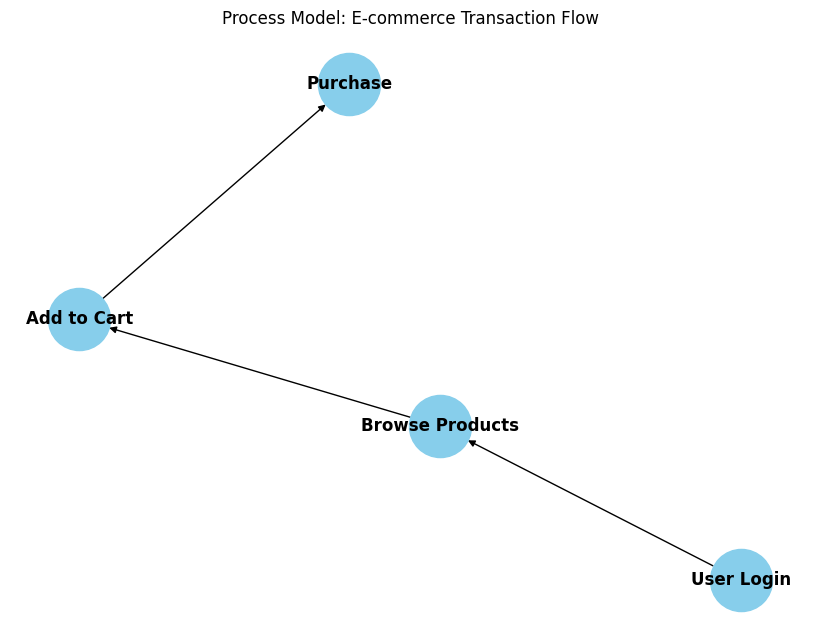

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the process model
process_model = nx.DiGraph()

# Add nodes representing steps in the process
process_model.add_nodes_from([
    ('User_Login', {'label': 'User Login'}),
    ('Browse_Products', {'label': 'Browse Products'}),
    ('Add_to_Cart', {'label': 'Add to Cart'}),
    ('Purchase', {'label': 'Purchase'})
])

# Add edges representing transitions between steps
process_model.add_edges_from([
    ('User_Login', 'Browse_Products'),
    ('Browse_Products', 'Add_to_Cart'),
    ('Add_to_Cart', 'Purchase')
])

# Draw the process model
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(process_model)
labels = nx.get_node_attributes(process_model, 'label')
nx.draw(process_model, pos, with_labels=True, labels=labels, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold')
plt.title("Process Model: E-commerce Transaction Flow")
plt.show()


In [5]:
import pandas as pd
user_data="user_data.csv"
transaction_data="transaction_data.csv"
event_logs_features="event_logs.csv"
feature_data="feature_data.csv"

In [3]:
# Step 3: Feature Extraction

# Extract features from user data
def extract_user_features(user_data):
    # Extract user ID column from user data
    user_features = user_data[['User_ID']]
    # Example: Convert age to age group (e.g., 18-25, 26-35, etc.)
    user_data['Age_Group'] = pd.cut(user_data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
    user_features = pd.concat([user_features, pd.get_dummies(user_data[['Age_Group', 'Gender']], columns=['Age_Group', 'Gender'])], axis=1)
    return user_features



# Extract features from transaction data
def extract_transaction_features(transaction_data):
    # Example: Calculate average transaction amount per user
    transaction_features = transaction_data.groupby('User_ID')['Amount'].mean().reset_index()
    transaction_features.rename(columns={'Amount': 'Avg_Transaction_Amount'}, inplace=True)
    return transaction_features

# Combine features from different sources
def combine_features(user_features, transaction_features, event_logs_features):
    # Print column names for debugging
    print("User Features Columns:", user_features.columns)
    print("Transaction Features Columns:", transaction_features.columns)
    
    # Check if 'User_ID' exists in both DataFrames before merging
    if 'User_ID' in user_features.columns and 'User_ID' in transaction_features.columns:
        combined_features = pd.merge(user_features, transaction_features, on='User_ID', how='left')
        combined_features = pd.merge(combined_features, event_logs_features, on='User_ID', how='left')
        combined_features.fillna(0, inplace=True)  # Fill missing values with 0
        return combined_features
    else:
        raise KeyError("Column 'User_ID' not found in user_features or transaction_features")

# Extract features from user data
user_features = extract_user_features(user_data)

# Extract features from transaction data
transaction_features = extract_transaction_features(transaction_data)

# Extract features from event logs
event_logs_features = generate_feature_data(event_logs)

# Combine features from different sources
combined_features = combine_features(user_features, transaction_features, event_logs_features)

# Print the combined features
print("Combined Features:")
print(combined_features.head())

User Features Columns: Index(['User_ID', 'Age_Group_18-25', 'Age_Group_26-35', 'Age_Group_36-45',
       'Age_Group_46-55', 'Age_Group_56-65', 'Gender_Female', 'Gender_Male'],
      dtype='object')
Transaction Features Columns: Index(['User_ID', 'Avg_Transaction_Amount'], dtype='object')
Combined Features:
  User_ID  Age_Group_18-25  Age_Group_26-35  Age_Group_36-45  Age_Group_46-55  \
0  User_0            False            False            False             True   
1  User_1             True            False            False            False   
2  User_2            False            False             True            False   
3  User_3             True            False            False            False   
4  User_4            False            False             True            False   

   Age_Group_56-65  Gender_Female  Gender_Male  Avg_Transaction_Amount  \
0            False           True        False              711.166667   
1            False          False         True           

In [4]:
print(combined_features.columns)


Index(['User_ID', 'Age_Group_18-25', 'Age_Group_26-35', 'Age_Group_36-45',
       'Age_Group_46-55', 'Age_Group_56-65', 'Gender_Female', 'Gender_Male',
       'Avg_Transaction_Amount', 'Add_to_Cart', 'Browse', 'Login', 'Purchase'],
      dtype='object')


In [5]:
combined_features = combined_features.drop('User_ID', axis=1)


In [6]:
print("Combined Features:")
print(combined_features.head())

Combined Features:
   Age_Group_18-25  Age_Group_26-35  Age_Group_36-45  Age_Group_46-55  \
0            False            False            False             True   
1             True            False            False            False   
2            False            False             True            False   
3             True            False            False            False   
4            False            False             True            False   

   Age_Group_56-65  Gender_Female  Gender_Male  Avg_Transaction_Amount  \
0            False           True        False              711.166667   
1            False          False         True              612.750000   
2            False          False         True              511.666667   
3            False          False         True              767.666667   
4            False           True        False              591.000000   

   Add_to_Cart  Browse  Login  Purchase  
0            1       5      3         1  
1            

In [7]:
from sklearn.preprocessing import StandardScaler

# Step 4: Data Transformation

# Encode categorical variables (if any)
def encode_categorical_features(combined_features):
    # No categorical variables in this example, skipping encoding
    return combined_features

# Handle missing values
import pandas as pd

def handle_missing_values(combined_features):
    # Convert non-numeric columns to numeric format
    combined_features = combined_features.apply(pd.to_numeric, errors='coerce')
    
    # Fill missing values with the mean of each column
    combined_features.fillna(combined_features.mean(), inplace=True)
    
    return combined_features


# Data transformation pipeline
def data_transformation_pipeline(combined_features):
    # Encode categorical variables
    combined_features = encode_categorical_features(combined_features)
    
    # Handle missing values
    combined_features = handle_missing_values(combined_features)
    
    return combined_features

# Perform data transformation
transformed_features = data_transformation_pipeline(combined_features)

# Print transformed features
print("Transformed Features:")
print(transformed_features.head())


Transformed Features:
   Age_Group_18-25  Age_Group_26-35  Age_Group_36-45  Age_Group_46-55  \
0            False            False            False             True   
1             True            False            False            False   
2            False            False             True            False   
3             True            False            False            False   
4            False            False             True            False   

   Age_Group_56-65  Gender_Female  Gender_Male  Avg_Transaction_Amount  \
0            False           True        False              711.166667   
1            False          False         True              612.750000   
2            False          False         True              511.666667   
3            False          False         True              767.666667   
4            False           True        False              591.000000   

   Add_to_Cart  Browse  Login  Purchase  
0            1       5      3         1  
1         

In [8]:

# Convert boolean values to numeric (1 and 0)
transformed_features_numeric = transformed_features.astype(int)

In [9]:
transformed_features_numeric

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase
0,0,0,0,1,0,1,0,711,1,5,3,1
1,1,0,0,0,0,0,1,612,3,1,3,3
2,0,0,1,0,0,0,1,511,1,2,0,4
3,1,0,0,0,0,0,1,767,2,2,1,4
4,0,0,1,0,0,1,0,591,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,0,1,561,3,4,4,3
996,0,1,0,0,0,1,0,579,3,3,1,5
997,0,0,0,0,1,1,0,371,3,3,4,2
998,0,0,0,1,0,0,1,403,4,5,2,1


In [10]:
from sklearn.model_selection import train_test_split
# Dummy labels (replace with actual labels when available)
labels = np.random.randint(2, size=len(combined_features))

# Features (input variables)
features = combined_features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(transformed_features_numeric, labels, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set - Features:", X_train.shape, "Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", y_test.shape)


Training set - Features: (800, 12) Labels: (800,)
Testing set - Features: (200, 12) Labels: (200,)


In [11]:
X_test.head()

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase
521,1,0,0,0,0,0,1,493,1,3,2,1
737,0,0,0,0,1,1,0,393,4,2,1,2
740,1,0,0,0,0,1,0,597,3,3,0,4
660,0,0,0,0,1,0,1,443,2,2,3,1
411,0,1,0,0,0,1,0,557,2,1,4,1


In [12]:
x_train_numeric = X_train.astype(int)
X_test_numeric = X_test.astype(int)

In [13]:
X_test_numeric

,Age_Group_18-25,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Gender_Female,Gender_Male,Avg_Transaction_Amount,Add_to_Cart,Browse,Login,Purchase
521,1,0,0,0,0,0,1,493,1,3,2,1
737,0,0,0,0,1,1,0,393,4,2,1,2
740,1,0,0,0,0,1,0,597,3,3,0,4
660,0,0,0,0,1,0,1,443,2,2,3,1
411,0,1,0,0,0,1,0,557,2,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
408,0,0,1,0,0,1,0,618,3,1,3,3
332,0,0,0,0,1,1,0,693,2,2,0,5
208,0,0,0,1,0,0,1,441,1,2,1,2
613,0,0,1,0,0,1,0,475,1,2,2,5


In [14]:
# Extract the underlying data from the DataFrame
x_train_numeric.columns = x_train_numeric.columns.astype(str)
x_train_data = x_train_numeric.values

In [17]:
x_train_data.shape

(800, 12)

In [18]:

random_forest = RandomForestClassifier()
random_forest.fit(x_train_data, y_train)

RandomForestClassifier()

In [26]:
x_train_data = x_train_numeric.values

# Now try fitting the model again using the extracted data
random_forest.fit(x_train_data, y_train)

RandomForestClassifier()

In [27]:
# Extract the underlying data from the DataFrame
X_test_data = X_test_numeric.values

# Evaluate the classifiers on the testing data
print("Random Forest Accuracy:", random_forest.score(X_test_data, y_test))

Random Forest Accuracy: 0.515


In [34]:
gradient_boosting = GradientBoostingClassifier()

gradient_boosting.fit(x_train_data, y_train)

print("Gradient Boosting Accuracy:", gradient_boosting.score(X_test_data, y_test))
print("Gradient Boosting Accuracy:", gradient_boosting.score(x_train_data, y_train))

Gradient Boosting Accuracy: 0.545
Gradient Boosting Accuracy: 0.785


In [29]:
adaboost = AdaBoostClassifier()

adaboost.fit(x_train_data, y_train)

print("AdaBoost Accuracy:", adaboost.score(X_test_data, y_test))


AdaBoost Accuracy: 0.53


In [20]:
import pickle

In [21]:
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

In [39]:
with open('gradient_boost.pkl', 'wb') as f:
    pickle.dump(gradient_boosting, f)

In [40]:
with open('adabost.pkl', 'wb') as f:
    pickle.dump(adaboost, f)

In [30]:
# Hyperparameter Tuning
# Define the parameter grid for each model
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5]}
param_grid_ab = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
adaboost = AdaBoostClassifier()

# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)
grid_search_ab = GridSearchCV(adaboost, param_grid_ab, cv=5)

# Fit the models
grid_search_rf.fit(x_train_data, y_train)
grid_search_gb.fit(x_train_data, y_train)
grid_search_ab.fit(x_train_data, y_train)

# Get the best estimators from the grid search
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_ab = grid_search_ab.best_estimator_

# Evaluate the classifiers on the testing data
print("Random Forest Accuracy:", best_rf.score(X_test_data, y_test))
print("Gradient Boosting Accuracy:", best_gb.score(X_test_data, y_test))
print("AdaBoost Accuracy:", best_ab.score(X_test_data, y_test))

Random Forest Accuracy: 0.51
Gradient Boosting Accuracy: 0.53
AdaBoost Accuracy: 0.51


In [25]:
import pickle
with open("random_forest.pkl","rb") as f:
    x=pickle.load(f)